## Load the python wrapper classes
- If you dont want to use opencl, you can just load the cpu version after making cpu_only

In [1]:
import numpy as np

from spsfast.spectrum_generator import Spectrum_generator
from spsfast.spectrum_generator_cpu import Spectrum_generator_cpu

# Test it

In [2]:
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Opencl with exponential star formation

In [3]:
#create instance
my_spec_gen=Spectrum_generator(measurement_file='../input/testspec1.csv',imf='chabrier',platform=0,device=0)

#generate a spectrum
start=time.time()
res=my_spec_gen.generate_spec(age=1e9,vdisp=150, metall=0.001,sfr_tau=1e8,dust_tau_v=1.0,dust_mu=0.7)
print time.time()-start

0.0106258392334


### Cpu only with exponential star formation

In [4]:
#create instance
my_spec_gen_cpu=Spectrum_generator_cpu(measurement_file='../input/testspec1.csv',imf='chabrier')

#generate a spectrum
start=time.time()
res_cpu=my_spec_gen_cpu.generate_spec(age=1e9,vdisp=150, metall=0.001,sfr_tau=1e8,dust_tau_v=1.0,dust_mu=0.7)
print time.time()-start

0.0208349227905


max diff: 2.5389460959e-10


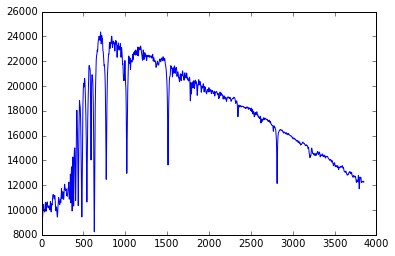

In [5]:
print 'max diff:',np.max((res-res_cpu)**2/(res*res_cpu))
plt.plot(res_cpu)

### Opencl  with user defined start formation

In [6]:
#generate a spectrum
start=time.time()
res=my_spec_gen.generate_spec(age=1e9,vdisp=150, metall=0.001,sfr_tau=1e8,dust_tau_v=1.0,dust_mu=0.7,
                                     sfr=np.ones(221))
print time.time()-start

0.00661897659302


### Cpu only with user defined start formation

In [7]:
#generate a spectrum
start=time.time()
res_cpu=my_spec_gen_cpu.generate_spec(age=1e9,vdisp=150, metall=0.001,sfr_tau=1e8,dust_tau_v=1.0,dust_mu=0.7,
                                     sfr=np.ones(221))
print time.time()-start

0.0130531787872


max diff: 2.4636831497e-10


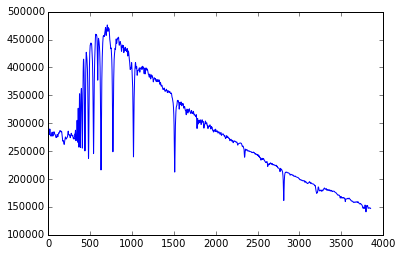

In [8]:
print 'max diff:',np.max((res-res_cpu)**2/(res*res_cpu))
plt.plot(res)

### Longer test for small variance

In [9]:
start=time.time()
specs=[]
for i in xrange(1000):
    specs.append(my_spec_gen.generate_spec())
print time.time()-start

5.66223812103


In [10]:
start=time.time()
specs=[]
for i in xrange(1000):
    specs.append(my_spec_gen_cpu.generate_spec())
print time.time()-start

18.9523620605
